# Прогнозирование оттока клиентов

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<b>Предоставляемые услуги</b>

1. Стационарная телефонная связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic).

Также доступны дополнительные услуги:

- интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity)
- выделенная линия технической поддержки (TechSupport)
- облачное хранилище файлов для резервного копирования данных (OnlineBackup)
- стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies)

За услуги клиенты могут платить ежемесячно или заключить договор на 1 или 2 года. Доступны различные способы расчёта и возможность получения электронного чека.

<br>
<br><b>Описание данных</b>

Данные находятся в четырех файлах:

- contract.csv — информация о договоре
- personal.csv — персональные данные клиента
- internet.csv — информация об интернет-услугах
- phone.csv — информация об услугах телефонии

Во всех файлах столбец "customerID" содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<br>
<br><b>Цель проекта</b>

Обучить модель, которая прогнозирует возможный уход клиента, использовав метрику качества AUC-ROC. Идеальное значение метрики - 0.85 и выше.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Contract-датасет" data-toc-modified-id="Contract-датасет-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Contract датасет</a></span></li><li><span><a href="#Personal-датасет" data-toc-modified-id="Personal-датасет-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Personal датасет</a></span></li><li><span><a href="#Internet-датасет" data-toc-modified-id="Internet-датасет-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Internet датасет</a></span></li><li><span><a href="#Phone-датасет" data-toc-modified-id="Phone-датасет-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phone датасет</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Сравнение моделей</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Тестовая выборка</a></span></li><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>ROC-кривая</a></span></li><li><span><a href="#Классификационный-отчет" data-toc-modified-id="Классификационный-отчет-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Классификационный отчет</a></span></li><li><span><a href="#Матрица-ошибок" data-toc-modified-id="Матрица-ошибок-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Матрица ошибок</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Загрузка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
import warnings

from phik.report import plot_correlation_matrix
#from phik import report
# для разделения выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
# для кодировки категориальных данных
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# для масштабирования численных данных
from sklearn.preprocessing import StandardScaler
# для создания pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# для подбора параметров GridSearchCV и кросс-валидации
from sklearn.model_selection import GridSearchCV, cross_val_score

# для построения модели Случайный лес
from sklearn.ensemble import RandomForestClassifier
# для построения модели Логистическая регрессия
from sklearn.linear_model import LogisticRegression
# библиотека CatBoost
from catboost import CatBoostClassifier
# библиотека LightGBM
from lightgbm import LGBMClassifier
# для вычисления AUC-ROC
from sklearn.metrics import roc_auc_score
# для ROC-кривой
from sklearn.metrics import roc_curve
# для построения PR curve
from sklearn.metrics import precision_recall_curve
# для classification_report
from sklearn.metrics import classification_report

# для выявления важности признаков
from sklearn.inspection import permutation_importance
# матрица ошибок
from sklearn.metrics import confusion_matrix

# убрать предупреждение SettingWithCopy от библиотек pandas и sklearn
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

RS = 261222

In [2]:
# загрузим датасеты и посмотрим на данные
contract = pd.read_csv('contract.csv')
personal = pd.read_csv('personal.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv')

### Contract датасет

In [3]:
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [6]:
contract.duplicated().sum()

0

В датасете 7043 строки и 8 столбцов. Все названия столбцов нужно переименовать в стиле "snake_case" для дальнейшего удобства. Пропусков нет.

Столбцы BeginDate и EndDate нужно перевести в формат даты. Столбец TotalCharges перевести в числовой тип.

Столбцы Type, PaperlessBilling и PaymentMethod содержат категориальные данные. Для обучения разных моделей будем использовать разные методики кодирования данных в числовые (OHE или OrdinalEncoder), модели CatBoost и LightGBM справятся с категориальными данными своими силами.

Значения "No" в столбце EndData означает, что клиент еще пользуется услугами. Значит можно использовать эти данные для формирования целевого признака: клиент активен или перестал пользоваться услугами.

В единственном числовом на данным момент столбце MonthlyCharges среднее значение 70 у.е., минимальное - 18, максимальное - 118. Выбросов нет.

Дубликатов в датасете нет.

In [7]:
contract['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Договоры есть 3-х типов: помесячная оплата, оплата за 1 год и за 2 года. Посмотрим распределение по типам договоров.

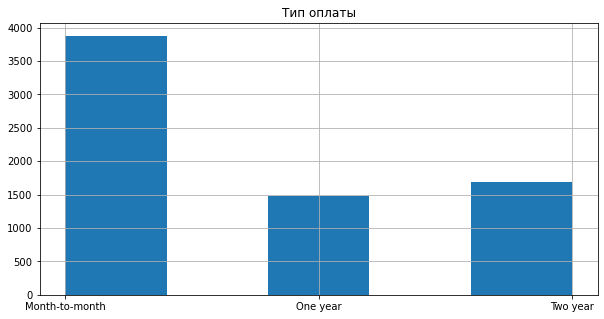

In [8]:
contract['Type'].hist(bins=5, figsize=(10,5))
plt.title('Тип оплаты');

Больше всего клиентов, оплачивающих услуги ежемесячно. Двухгодичных контрактов больше, чем годовых, значит условия оплаты сразу за 2 года выгоднее.

In [9]:
contract['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

Столбец с выставлением счета на эл.почту имеет два варианта: да и нет. Большая часть клиентов получает счет электронно.

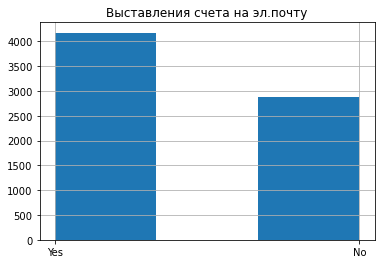

In [10]:
contract['PaperlessBilling'].hist(bins=3)
plt.title('Выставления счета на эл.почту');

In [11]:
contract['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Клиенты оплачивают услуги четырьмя способами.

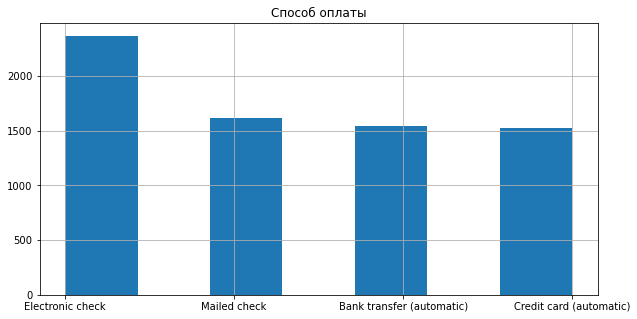

In [12]:
contract['PaymentMethod'].hist(bins=7, figsize=(10,5))
plt.title('Способ оплаты');

Большинство пользователей оплачивают услуги 'electronic check', так как это самый удобный способ оплаты, остальные способы распределены примерно одинаково.

Посмотрим, сколько стоит месяц услуг в зависимости от типа договора (ежемесячный, годовой и двухгодичный).

In [13]:
contract.pivot_table(index='Type', values='MonthlyCharges')

,MonthlyCharges
Type,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


Все логично: чем больше срок оплаты, тем меньше цена за месяц. 

Рассмотрим распределение числового признака.

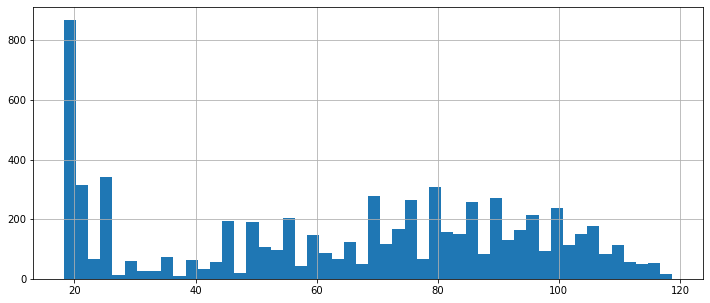

In [14]:
contract['MonthlyCharges'].hist(bins=50, figsize=(12,5));

Видим необычный выброс около значения 20, также остальные столбцы странно "пляшут", нужно будет детальнее рассмотреть этот признак.

<b>Выводы:</b>
- нужно переименовать признаки в стиле "snake_case"
- столбцы BeginDate и EndDate нужно перевести в формат даты, столбец TotalCharges перевести в числовой тип
- из столбца EndData можно сформировать целевой признак ухода клиента
- затем заменить все значения No в столбце на 01.02.2020, после чего можно создать новый признак: общее кол-во дней пользования услугами компании
- дополнительно нужно изучить признак ежемесячной оплаты: выброс и странное распределение


### Personal датасет

In [15]:
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [16]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [17]:
(personal['customerID'] == contract['customerID']).sum()

7043

В этом датасете 7043 строки и 5 столбцов, пропусков нет. Пользователи по id совпадают с пользователями из датасета contract. Названия столбцов нужно заменить в стиле "snake_case".

In [18]:
personal['gender'].unique()

array(['Female', 'Male'], dtype=object)

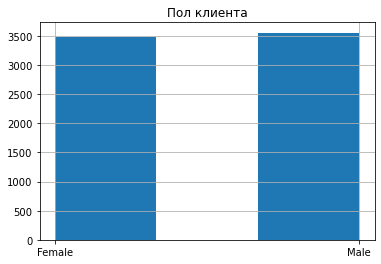

In [19]:
personal['gender'].hist(bins=3)
plt.title('Пол клиента');

Мужчин и женщин в датасете почти поровну.

In [20]:
personal['SeniorCitizen'].unique()

array([0, 1])

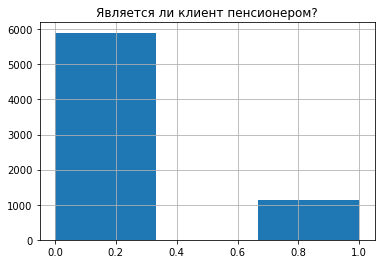

In [21]:
personal['SeniorCitizen'].hist(bins=3)
plt.title('Является ли клиент пенсионером?');

In [22]:
personal['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

В столбце SeniorCitizen всего два значения 0 и 1, тип данных можно изменить на int8 вместо int64. Пенсионеров в датасете значительно меньше - 16% от общего числа пользователей.

In [23]:
personal['Partner'].unique()

array(['Yes', 'No'], dtype=object)

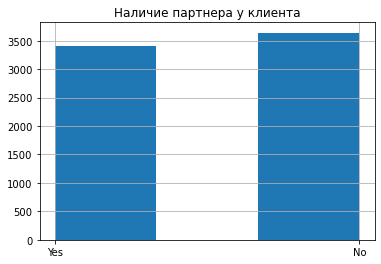

In [24]:
personal['Partner'].hist(bins=3)
plt.title('Наличие партнера у клиента');

Холостых клиентов чуть больше, чем в браке.

In [25]:
personal['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

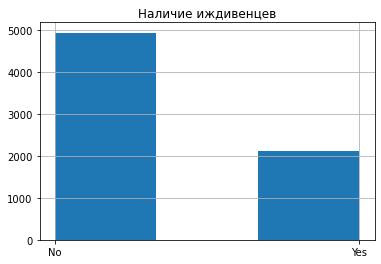

In [26]:
personal['Dependents'].hist(bins=3)
plt.title('Наличие иждивенцев');

У большей части клиентов нет иждивенцев (детей или родителей на обеспечении).

<b>Выводы:</b>
- названия столбцов нужно заменить в стиле "snake_case"
- пользователи совпадают с пользователями из датасета contract
- тип данных столбца SeniorCitizen можно изменить на int8 вместо int64
- по графикам распределений категорий среди всех пользователей можно составить общий портрет клиента: не пенсионер, без детей. Пенсионеров всего 16%, мужчины и женщины распределены одинаково, наличие супруга/и тоже практически равное.

### Internet датасет

In [27]:
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [29]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


В датасете internet пользователей значительно меньше, чем в предыдущих (всего 5517), так как не все пользователи телефонии подключают услуги домашнего интернета. В столбцах с доп.услугами по два значения: подключена услуга или нет. Чаще доп.услуги не подключены, так как многие даже не понимают смысла этих услуг, а те, кто понимает, скорее всего используют свои облачные сервисы и сервисы по защите данных. 

Сам интернет чаще проведен Fiber optic, DSL значительно меньше, так как DSL обладает меньшей скоростью и его устанавливают обычно там, где нет возможности провести оптоволоконный кабель.

С доп.услугами ТВ и каталогом фильмов интереснее, распределение примерно поровну. Те, кто подключает услугу ТВ, скорее всего подключает и каталог с фильмами.

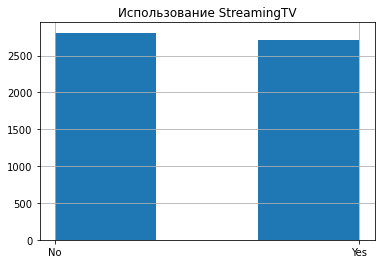

In [30]:
internet['StreamingTV'].hist(bins=3)
plt.title('Использование StreamingTV');

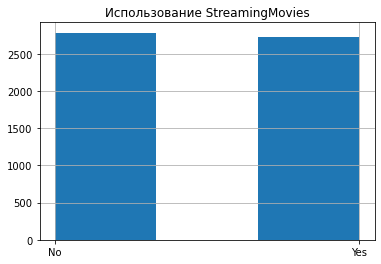

In [31]:
internet['StreamingMovies'].hist(bins=3)
plt.title('Использование StreamingMovies');

<b>Выводы:</b>
- не все пользователи пользуются услугами интернета и доп.услугами
- чаще пользователи не подключают доп.услуги
- названия столбцов нужно заменить в стиле "snake_case"
- примерно половина пользователей, которые подключают интернет, подключают услуги TV c каталогом фильмов

### Phone датасет

In [32]:
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [33]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [34]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


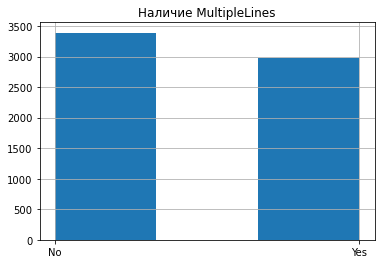

In [35]:
phone['MultipleLines'].hist(bins=3)
plt.title('Наличие MultipleLines');

<b>Выводы:</b>
- названия столбцов нужно заменить в стиле "snake_case"
- в датасете 6361 строк, пользователей больше, чем в датасете с услугами интернета, но меньше общего количества пользователей. Часть пользователей пользуется только интернет-услугами, часть - только телефонией. 
- все пользователи в датасете уникальны
- пропусков в данных нет
- в столбце MultipleLines всего 2 значения (Да и Нет), причем у большей половины пользователей эта услуга не подключена

## Предобработка данных

Для начала переименуем все названия столбцов в одном стиле для удобства работы с ними.

In [36]:
contract.columns = ['id', 'begin_date', 'end_date', 'type', 'paper_less', 'method', 'month', 'total']
contract.columns

Index(['id', 'begin_date', 'end_date', 'type', 'paper_less', 'method', 'month',
       'total'],
      dtype='object')

In [37]:
personal.columns = ['id', 'gender', 'pensioner', 'partner', 'dependents']
personal.columns

Index(['id', 'gender', 'pensioner', 'partner', 'dependents'], dtype='object')

In [38]:
internet.columns = ['id', 'internet_s', 'security', 'backup', 'protection', 'support', 'tv', \
                    'movies']
internet.columns

Index(['id', 'internet_s', 'security', 'backup', 'protection', 'support', 'tv',
       'movies'],
      dtype='object')

In [39]:
phone.columns = ['id', 'multiple_lines']
phone.columns

Index(['id', 'multiple_lines'], dtype='object')

In [40]:
phone.columns = ['id', 'multiple_lines']
phone.columns

Index(['id', 'multiple_lines'], dtype='object')

Теперь добавим целевой признак churn. Если в столбце end_date указана дата, значит клиент ушел, если даты нет (значение No) - значит клиент продолжает пользоваться услугами.

In [41]:
contract['churn'] = (contract['end_date'] != 'No').astype('int8')
contract.head(10)

,id,begin_date,end_date,type,paper_less,method,month,total,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


Заменим все значения No в столбце end_date на 2020-02-01.

In [42]:
contract['end_date'] = contract['end_date'].where(contract['end_date'] != 'No', '2020-02-01')
contract['end_date']

0                2020-02-01
1                2020-02-01
2       2019-12-01 00:00:00
3                2020-02-01
4       2019-11-01 00:00:00
               ...         
7038             2020-02-01
7039             2020-02-01
7040             2020-02-01
7041    2019-11-01 00:00:00
7042             2020-02-01
Name: end_date, Length: 7043, dtype: object

Изменим типы данных в столбцах с датой на datetime, а столбец total - на числовой тип.

In [43]:
contract['begin_date'] = pd.to_datetime(contract['begin_date'])
contract['end_date'] = pd.to_datetime(contract['end_date'])

In [44]:
contract['total'] = pd.to_numeric(contract['total'], errors='coerce')

In [45]:
# выведем строки, в которых total остался незаполненным
contract[contract['total'].isna()]

,id,begin_date,end_date,type,paper_less,method,month,total,churn
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0


У всех этих клиентов одна начальная и конечная дата пользования услугами - 1 февраля 2020, то есть они только что заключили договор с компанией. У нас нет информации об оплатах после этой даты, поэтому заполним пропуски значениями из столбца month, так как скорее всего первый платеж они совершили.

In [46]:
contract['total'] = contract['total'].fillna(contract['month'])

Создадим новый признак - общее количество дней, когда клиент пользовался услугами компании. Для этого из конечной даты вычтем начальную дату.

In [47]:
contract['period'] = (contract['end_date'] - contract['begin_date']).dt.days
contract['period']

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: period, Length: 7043, dtype: int64

In [48]:
# проверим еще раз наш датасет
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          7043 non-null   object        
 1   begin_date  7043 non-null   datetime64[ns]
 2   end_date    7043 non-null   datetime64[ns]
 3   type        7043 non-null   object        
 4   paper_less  7043 non-null   object        
 5   method      7043 non-null   object        
 6   month       7043 non-null   float64       
 7   total       7043 non-null   float64       
 8   churn       7043 non-null   int8          
 9   period      7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), int8(1), object(4)
memory usage: 502.2+ KB


И еще заменим в датасете personal тип данных в столбце pensioner на int8 вместо int64.

In [49]:
personal['pensioner'] = personal['pensioner'].astype('int8')
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7043 non-null   object
 1   gender      7043 non-null   object
 2   pensioner   7043 non-null   int8  
 3   partner     7043 non-null   object
 4   dependents  7043 non-null   object
dtypes: int8(1), object(4)
memory usage: 227.1+ KB


Датасеты готовы, теперь можно их объединить в один по столбцу ID клиента. Если клиент не пользуется какими-либо услугами, будут пропуски в данных - воспользуемся типом объединения outer.

In [50]:
data = contract\
    .merge(personal, how='outer', on='id')\
    .merge(internet, how='outer', on='id') \
    .merge(phone, how='outer', on='id') 

In [51]:
data.head()

,id,begin_date,end_date,type,paper_less,method,month,total,churn,period,...,partner,dependents,internet_s,security,backup,protection,support,tv,movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [52]:
# появились пропуски, как и ожидались
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              7043 non-null   object        
 1   begin_date      7043 non-null   datetime64[ns]
 2   end_date        7043 non-null   datetime64[ns]
 3   type            7043 non-null   object        
 4   paper_less      7043 non-null   object        
 5   method          7043 non-null   object        
 6   month           7043 non-null   float64       
 7   total           7043 non-null   float64       
 8   churn           7043 non-null   int8          
 9   period          7043 non-null   int64         
 10  gender          7043 non-null   object        
 11  pensioner       7043 non-null   int8          
 12  partner         7043 non-null   object        
 13  dependents      7043 non-null   object        
 14  internet_s      5517 non-null   object        
 15  secu

Пропуски в данных столбцах означают, что клиент не пользуется данной услугой, заменим все пропуски на No.

In [53]:
data = data.fillna('No')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              7043 non-null   object        
 1   begin_date      7043 non-null   datetime64[ns]
 2   end_date        7043 non-null   datetime64[ns]
 3   type            7043 non-null   object        
 4   paper_less      7043 non-null   object        
 5   method          7043 non-null   object        
 6   month           7043 non-null   float64       
 7   total           7043 non-null   float64       
 8   churn           7043 non-null   int8          
 9   period          7043 non-null   int64         
 10  gender          7043 non-null   object        
 11  pensioner       7043 non-null   int8          
 12  partner         7043 non-null   object        
 13  dependents      7043 non-null   object        
 14  internet_s      7043 non-null   object        
 15  secu

In [55]:
# проверим все id на уникальность
data['id'].is_unique

True

<b>Промежуточный вывод</b>

В ходе данного пункта мы подготовили данные к дальнейшему анализу и обучению моделей, а именно:
- переименовали столбцы в удобный вид
- изменили некоторые типы данных
- обработали появившиеся пропуски
- проверили id клиентов на уникальность
- добавили целевой признак ухода клиента
- добавили новый признак общего кол-ва дней пользования услугами каждого клиента
- объединили 4 датасета в один

## Исследовательский анализ данных

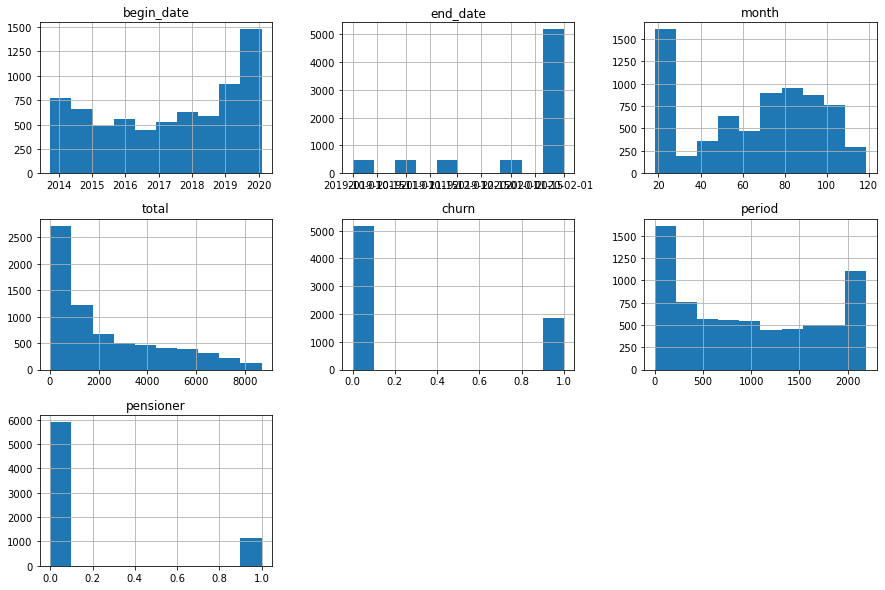

In [56]:
# построим гистограмму
data.hist(figsize=(15, 10));

Из графиков видим:
- компания предоставляет услуги с конца 2013 года, с 2014 года кол-во клиентов медленно идет на спад, с середины 2019 года резкий скачок на увеличение
- клиенты равномерно уходили из компании, последний пик на графике непоказателен - в нем собраны все действующие клиенты + ушедшие
- видим большой пик в помесячной оплате в районе значения 20, скорее всего такую стоимость оплачивают клиенты, которые используют только один тип услуг, например телефонию
- общие оплаты уменьшаются, что логично, "старые" клиенты оплатили за все время пользования услуг больше, чем новенькие
- в целевом признаке ухода клиента видим дисбаланс, действующих клиентов намного больше ушедших
- в признаке period видим два пика. Первый пик говорит о том, что часть клиентов уходит слишком быстро, но также тут собраны и новые клиенты, которые просто не успели "собрать" большую статистику (так как в конце исследуемого периода пришло очень много новых клиентов). Также есть большое количество "старичков", которые пользуются услугами более пяти лет.

In [57]:
data.describe()

,month,total,churn,period,pensioner
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.798992,0.265370,985.996166,0.162147
std,30.090047,2266.730170,0.441561,747.587844,0.368612
min,18.250000,18.800000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,273.000000,0.000000
50%,70.350000,1394.550000,0.000000,883.000000,0.000000
75%,89.850000,3786.600000,1.000000,1676.000000,0.000000
max,118.750000,8684.800000,1.000000,2191.000000,1.000000


В среднем клиенты оплачивают 64 у.е. в месяц, но есть и те, кто всего 18 у.е. Продолжительность жизни клиента в компании в среднем 2,5 года.

Посмотрим на зависимости ежемесячных платежей и на уход клиентов.

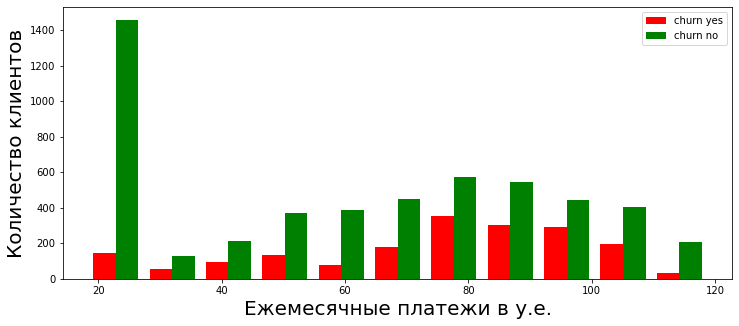

In [58]:
churn_yes = data[data['churn']==1]['month']
churn_no = data[data['churn']==0]['month']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=11, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Ежемесячные платежи в у.е.', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Чаще всего уходят клиенты, которые платят от 70 до 110 у.е. за месяц. Скорее всего они оплачивают разные услуги, но не всеми пользуются (и поэтому хотят прекратить договор) или предоставляемые доп.услуги не надлежащего качества. 

Меньше всего уходят клиенты, которые платят максимальную сумму. Скорее всего это юридические лица - их устраивает качество услуг или они не хотят менять поставщика услуг, так как для компании это достаточно проблематично и трудозатратно.

Малоплатящие клиенты уходят, но не в больших пропорциях относительно тех, кто остается.

Я бы порекомендовала компании проверить качество своих доп.услуг, а также уточнить, все ли клиенты понимают, за что они платят. Возможно по договору трудно или невозможно отказаться от ненужных услуг, и клиент вынужден искать другую компанию.

Рассмотрим уход клиентов по дате подписания договора.

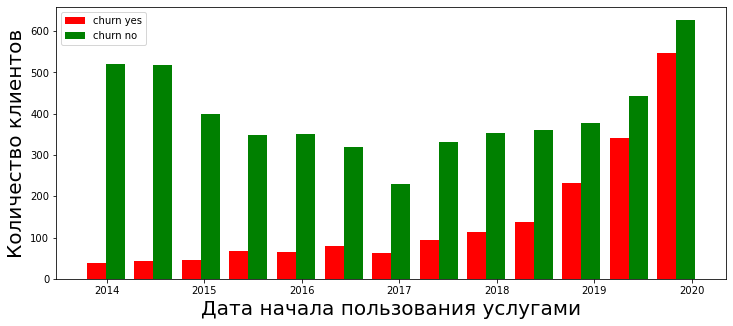

In [59]:
churn_yes = data[data['churn']==1]['begin_date']
churn_no = data[data['churn']==0]['begin_date']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=13, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Дата начала пользования услугами', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Видим активный тренд ухода клиентов, с каждым периодом (полгода) ушедших клиентов все больше, особенно рост заметен с 2018 года. Начиная с 2019 года более половины от кол-ва новых клиентов уходят. Это скорее всего говорит о качестве услуг или несоответствии цена/качество.

Рассмотрим зависимости ухода клиентов от типа договора (ежемесячный, годовой или двухгодовой).

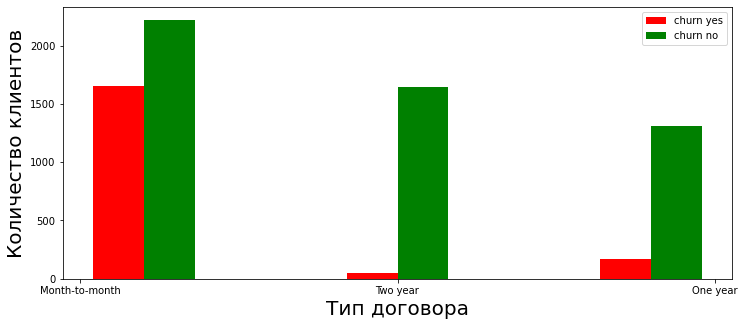

In [60]:
churn_yes = data[data['churn']==1]['type']
churn_no = data[data['churn']==0]['type']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=5, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Тип договора', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Больше всего уходят клиенты, которые оплачивают услуги помесячно. Скорее всего условия "долгих" договоров намного лояльнее. И опять же этот график показывает, что возможная причина ухода - плохое качество услуг. Цена тоже имеет значение, но разница между ежемесячным платежем и за месяц при оплате сразу за год - минимальная (66.39 и 65).

Теперь проверим зависимости относительно способа оплаты услуг.

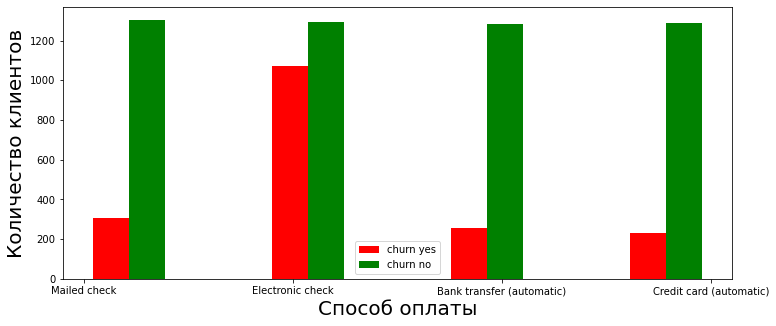

In [61]:
churn_yes = data[data['churn']==1]['method']
churn_no = data[data['churn']==0]['method']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=7, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Способ оплаты', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Сразу бросается в глаза огромное кол-во ушедших, оплачивающих услуги электронно. Скорее всего есть какие-то технические проблемы по оплате этим способом.

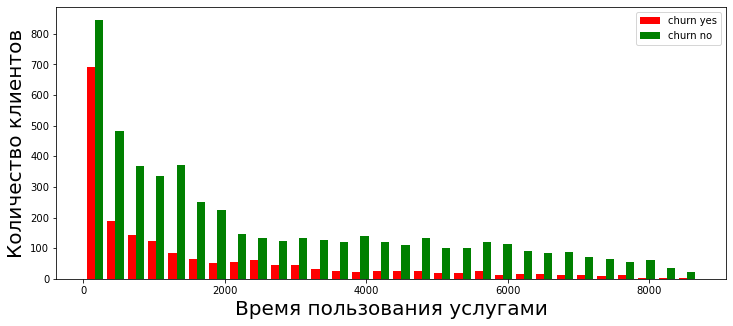

In [62]:
churn_yes = data[data['churn']==1]['total']
churn_no = data[data['churn']==0]['total']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=30, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Время пользования услугами', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Опять видим, что очень много клиентов отказываются в течение первого года после заключения договора. Рассмотрим этот график поближе.

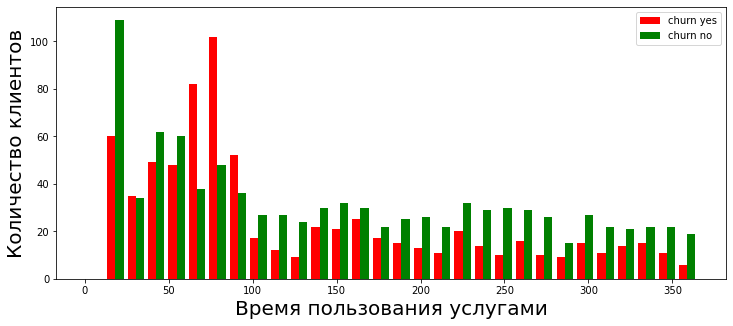

In [63]:
churn_yes = data[data['churn']==1]['total']
churn_no = data[data['churn']==0]['total']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=30, range=(0, 365), color=['red', 'green'], \
         label = ['churn yes', 'churn no'])
plt.xlabel('Время пользования услугами', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Большой отток клиентов в первые три месяца пользования услугами. В конце второго месяца число ушедших в 2 раза превышает оставшихся. Первый пик оттока приходится на первые 20 дней - опять же мы можем предположить некачественные услуги.

Бегло просмотрим зависимости ухода клиентов от признаков: пол клиента, есть ли партнер, есть ли иждивенцы и пенсионер ли клиент.

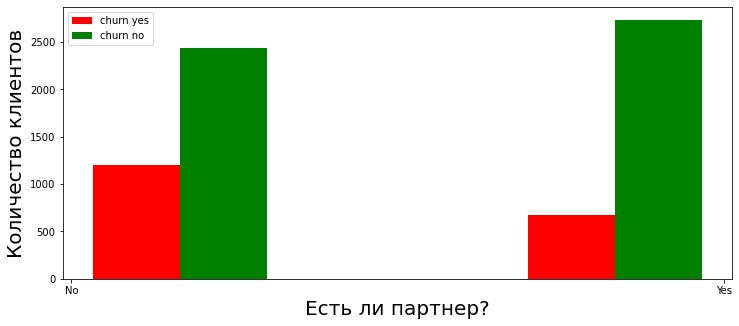

In [64]:
churn_yes = data[data['churn']==1]['partner']
churn_no = data[data['churn']==0]['partner']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Есть ли партнер?', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

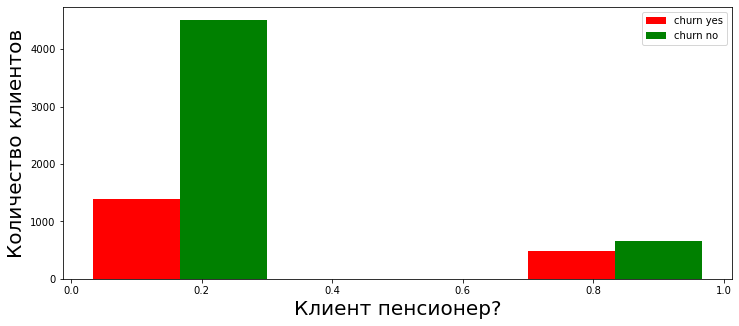

In [65]:
churn_yes = data[data['churn']==1]['pensioner']
churn_no = data[data['churn']==0]['pensioner']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Клиент пенсионер?', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

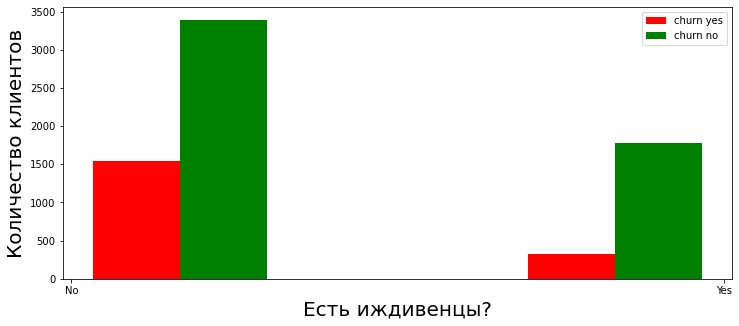

In [66]:
churn_yes = data[data['churn']==1]['dependents']
churn_no = data[data['churn']==0]['dependents']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Есть иждивенцы?', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

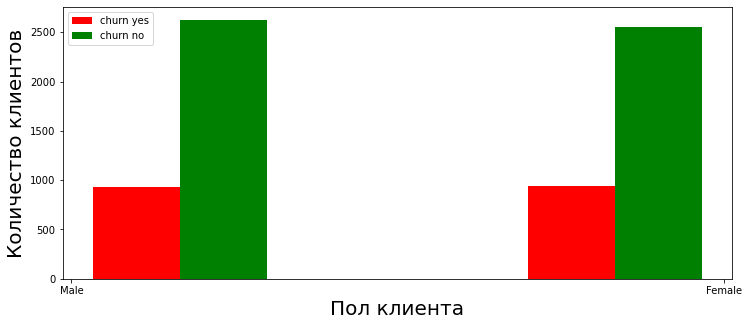

In [67]:
churn_yes = data[data['churn']==1]['gender']
churn_no = data[data['churn']==0]['gender']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Пол клиента', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Видим:
- одинокие люди чаще отказываются от услуг, нежели находясь в паре
- пенсионеры практически все отказываются от услуг
- клиенты без иждивенцев уходят чаще, чем с детьми/родителями
- пол клиента не влияет на уход

Теперь разберемся с доп.услугами и с доставкой счетов на эл.почту.

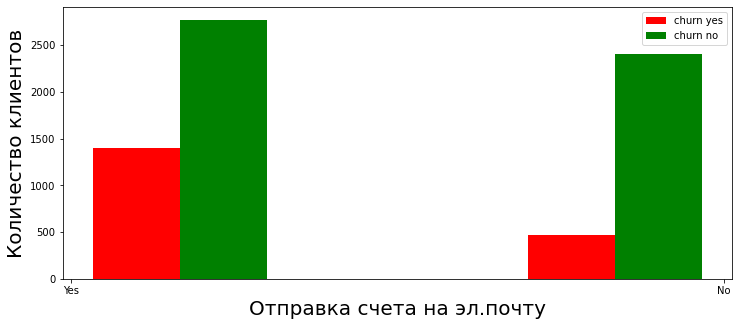

In [68]:
churn_yes = data[data['churn']==1]['paper_less']
churn_no = data[data['churn']==0]['paper_less']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Отправка счета на эл.почту', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Видим опять проблему с электронными услугами. Возможно, счет приходит на эл.почту, но клиент не может оплатить этот счет по техническим не зависящим от него причинам. Техническим специалистам компании нужно обязательно проверить все услуги, связанные с электронной оплатой.

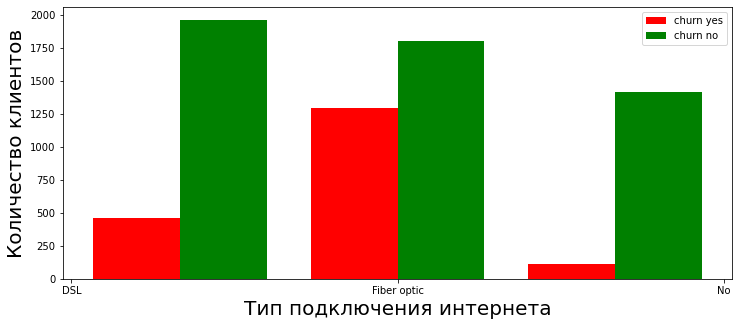

In [69]:
churn_yes = data[data['churn']==1]['internet_s']
churn_no = data[data['churn']==0]['internet_s']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Тип подключения интернета', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

А вот и возможный ответ на вопрос: уходят в основном клиенты, у которых подключен интернет оптоволокно. Значит проблема именно в этой категории услуг. Клиенты, которые не пользуются интернетом, практически не уходят.

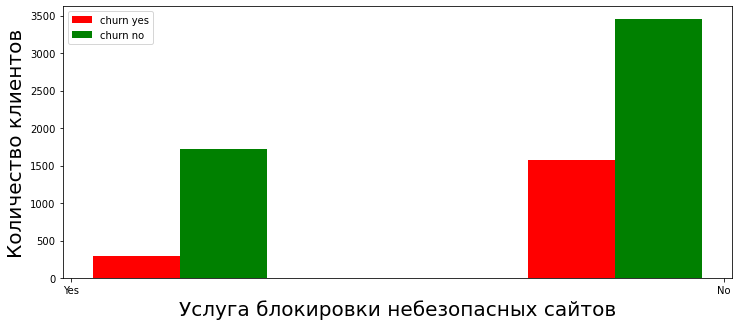

In [70]:
churn_yes = data[data['churn']==1]['security']
churn_no = data[data['churn']==0]['security']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга блокировки небезопасных сайтов', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

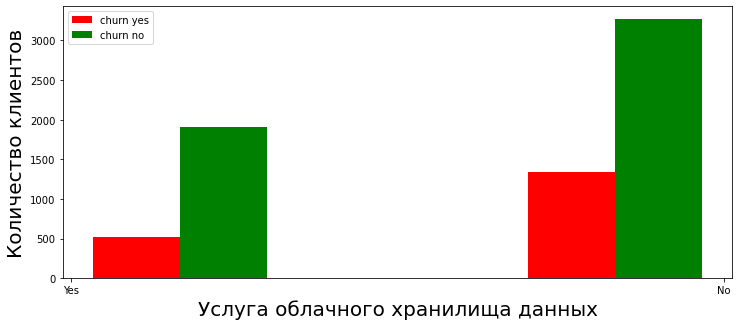

In [71]:
churn_yes = data[data['churn']==1]['backup']
churn_no = data[data['churn']==0]['backup']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга облачного хранилища данных', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

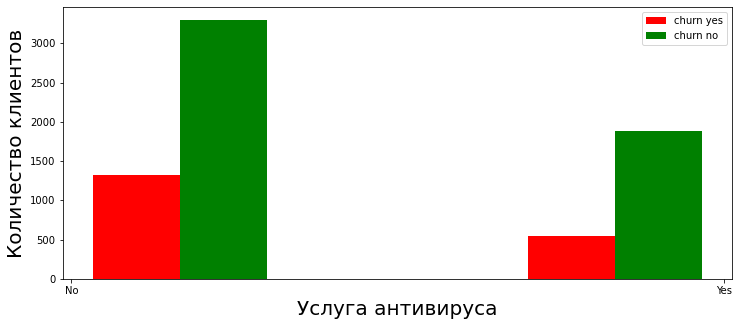

In [72]:
churn_yes = data[data['churn']==1]['protection']
churn_no = data[data['churn']==0]['protection']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга антивируса', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

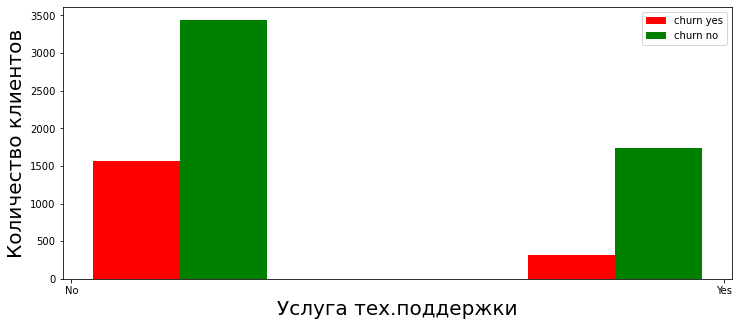

In [73]:
churn_yes = data[data['churn']==1]['support']
churn_no = data[data['churn']==0]['support']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга тех.поддержки', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

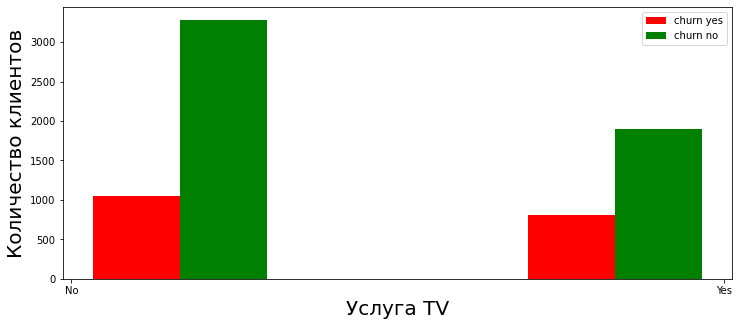

In [74]:
churn_yes = data[data['churn']==1]['tv']
churn_no = data[data['churn']==0]['tv']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга TV', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

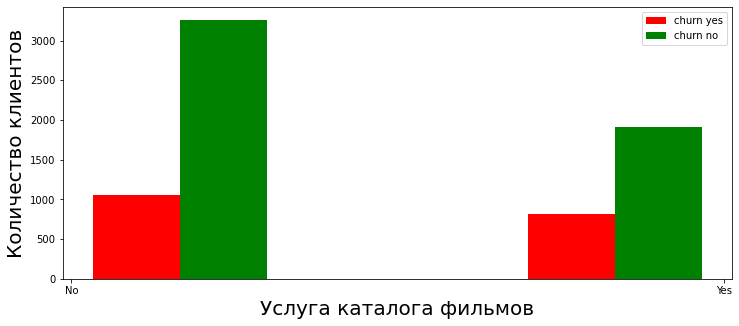

In [75]:
churn_yes = data[data['churn']==1]['movies']
churn_no = data[data['churn']==0]['movies']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга каталога фильмов', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

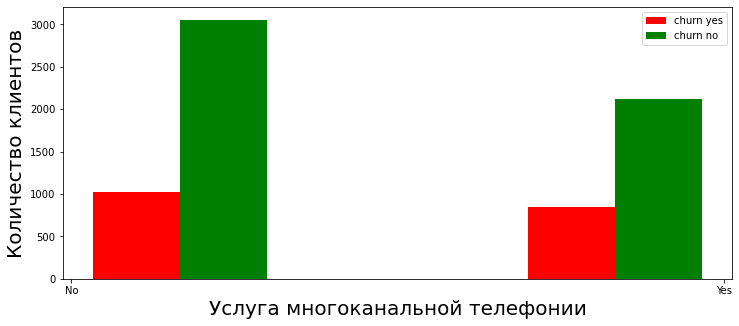

In [76]:
churn_yes = data[data['churn']==1]['multiple_lines']
churn_no = data[data['churn']==0]['multiple_lines']

plt.figure(figsize=(12,5))
plt.hist([churn_yes, churn_no], bins=3, color=['red', 'green'], label = ['churn yes', 'churn no'])
plt.xlabel('Услуга многоканальной телефонии', fontsize=20)
plt.ylabel("Количество клиентов", fontsize=20)
plt.legend();

Подключенные доп.услуги блокировки небезопасных сайтов, облачного хранилища, антивируса, тех.поддержки значительно снижают уход клиентов. Подключение TV с каталогом фильмов и многоканальная телефония особо не влияют на отток клиентов.

Рассмотрим корреляцию числовых и категориальных признаков.

In [77]:
numeric = ['month', 'total', 'period'] 

In [78]:
data[numeric].corr()

,month,total,period
month,1.000000,0.651182,0.247754
total,0.651182,1.000000,0.826095
period,0.247754,0.826095,1.000000


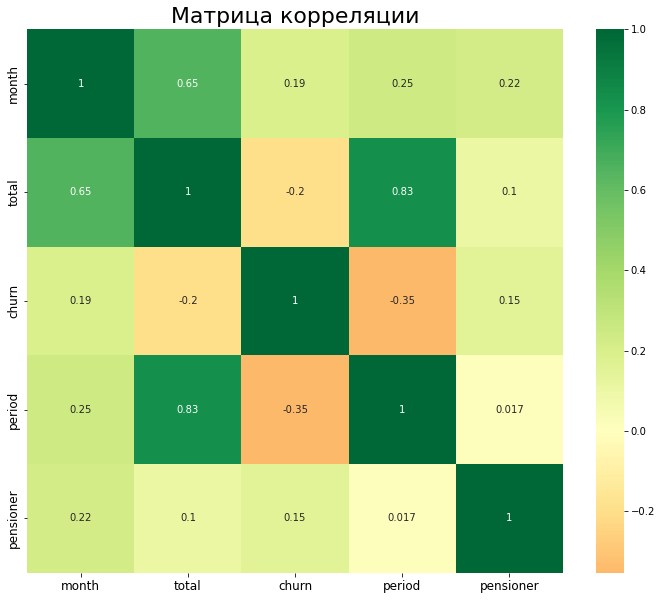

In [79]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, \
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [80]:
phik_overview = data.phik_matrix(interval_cols=numeric)

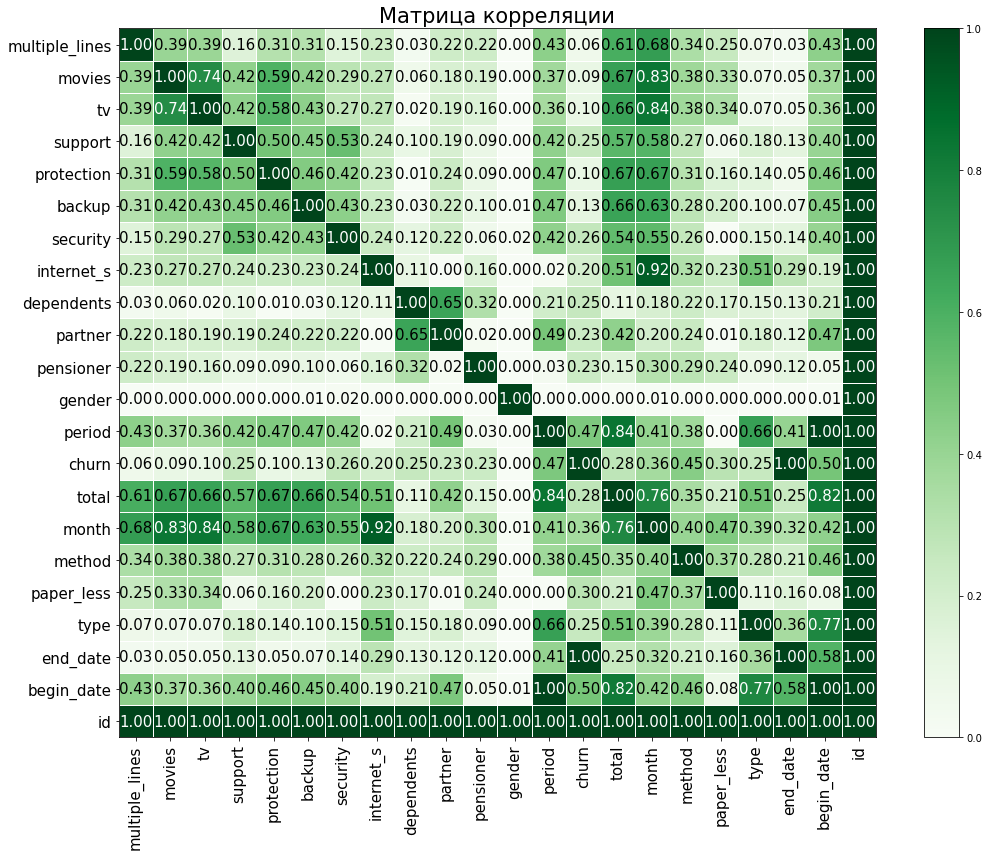

In [81]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title="Матрица корреляции", 
                        fontsize_factor=1.5, 
                        figsize=(15, 12))
plt.tight_layout()

Видим большую корреляцию в 0.83 между признаками total и period, что логично. Чем дольше клиент пользуется услугами компании, тем больше в сумме он платит. Удалим лишний признак total (хотя мультиколлинеарность критична только для линейных моделей), чтобы он не мешал обучению модели - хуже точно не будет :)

Признак пола клиента абсолютно ни на что не влияет.

Также видим зависимости между оплатой услуг за месяц и доп.услугами. Чем больше включено услуг, тем больше оплата.

<b>Промежуточный вывод</b>

В ходе работы над данным пунктом выявлено много интересных особенностей:
- с середины 2019 года в компании наблюдается резкое увеличение кол-ва новых клиентов
- в целевом признаке дисбаланс классов
- чаще всего уходят клиенты, которые платят от 70 до 110 у.е. за месяц
- меньше всего уходят клиенты, которые платят максимальную сумму
- с 2018 года наблюдается массовый отток клиентов, с 2019 года более половины от новых клиентов уходят
- больше всего уходят клиенты, которые оплачивают услуги помесячно
- огромное кол-во ушедших, оплачивающих услуги электронно
- большой отток клиентов в первые три месяца пользования услугами. В конце второго месяца число ушедших в 2 раза превышает оставшихся. Первый пик оттока приходится на первые 20 дней.
- одинокие люди чаще отказываются от услуг
- пенсионеры практически все отказываются от услуг
- клиенты без иждивенцев уходят чаще, чем с детьми/родителями
- пол клиента не влияет на уход
- уходят в основном клиенты, у которых подключен интернет оптоволокно
- клиенты, которые не пользуются интернетом, практически не уходят
- подключенные доп.услуги (блокировка небезопасных сайтов, облачное хранилище, антивирус, тех.поддержка) значительно снижают уход клиентов
- видим возможные проблемы в технической части: само качество предоставляемых услуг + оплата электронными способами

Данные проанализированы, сделаны выводы, можно приступать к подготовке данных к обучению.

## Подготовка данных к обучению

Удалим ненужные для обучения признаки: id клиента, дата начала и окончания договора, общую оплаченную сумму.

In [82]:
data = data.drop(['id', 'begin_date', 'end_date', 'total'], axis=1)

In [83]:
# проверим
data.columns

Index(['type', 'paper_less', 'method', 'month', 'churn', 'period', 'gender',
       'pensioner', 'partner', 'dependents', 'internet_s', 'security',
       'backup', 'protection', 'support', 'tv', 'movies', 'multiple_lines'],
      dtype='object')

Выделим фичи и целевой признак churn.

In [84]:
features = data.drop('churn', axis=1)
target = data['churn']

In [85]:
# разделим данные на обучающую и тестовую выбороки
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, test_size=0.25, random_state=RS, stratify=target)

In [86]:
# проверим размеры
print(features_train.shape)
features_test.shape

(5282, 17)


(1761, 17)

In [87]:
# проверим соотношение классов в обучающей выборке
target_train.value_counts(normalize=True)

0    0.73457
1    0.26543
Name: churn, dtype: float64

Для обучения разных моделей нужны разные типы кодировки категориальных данных:

- Для библиотеки CatBoost не нужно кодировать категориальные признаки, просто укажем список категориальных признаков в параметрах модели.
- Случайный лес справится с кодировщиком OrdinalEncoder. Также эта модель хорошо обучается на данных с разным масштабом числовых признаков.
- Для Линейной регрессии нужен кодировщик OneHotEncoder, чтобы не придавать веса категориям с большим числовым кодом. И дополнительно для нее масштабируем числовые признаки.
- Для LightGBM сменим тип категориальных данных на category.

Чтобы не было утечки данных при кодировании и масштабировании признаков, будем использовать pipeline.

In [88]:
numeric = ['month', 'period']
categorical = ['type', 'paper_less', 'method', 'gender', 'partner', 'dependents', \
    'internet_s', 'security', 'backup', 'protection', 'support', 'tv', 'movies', 'multiple_lines']

Данные подготовлены к обучению моделей, выборки созданы, приступаем к обучению.

## Обучение моделей

### Случайный лес 

In [89]:
cat_transformer_forest = Pipeline(steps=[('ordinalencoder', \
                        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=1000))])

In [90]:
transformer_forest = ColumnTransformer(
    transformers=[
        ('cat_data_prep', cat_transformer_forest, categorical)
])

In [91]:
pipeline_forest = Pipeline(steps=[
    ('transformer', transformer_forest),
    ('dt_estimator', RandomForestClassifier(random_state=RS))
])

In [92]:
param_grid_forest = {'dt_estimator__max_depth': range(1, 10), 
             'dt_estimator__n_estimators': range(1, 102, 10)}

grid_search_forest = GridSearchCV(pipeline_forest, param_grid_forest, cv=5, \
                           scoring='roc_auc')
grid_search_forest.fit(features_train, target_train)
roc_forest = grid_search_forest.best_score_

print(f'AUC-ROC Случайного леса: {roc_forest}') 
print(f'Лучшие гиперпараметры: {grid_search_forest.best_params_}')

AUC-ROC Случайного леса: 0.8262557455751866
Лучшие гиперпараметры: {'dt_estimator__max_depth': 5, 'dt_estimator__n_estimators': 91}


Метрика AUC-ROC достаточна хорошая.

### Логистическая регрессия

In [93]:
cat_transformer_log = Pipeline(steps=[('onehotencoder', \
                        OneHotEncoder(handle_unknown='ignore'))])

In [94]:
num_transformer_log = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [95]:
transformer_log = ColumnTransformer(
    transformers=[
        ('cat_data_prep', cat_transformer_log, categorical),
        ('num_data_prep', num_transformer_log, numeric)
])

In [96]:
pipeline_log = Pipeline(steps=[
    ('transformer', transformer_log),
    ('dt_estimator', LogisticRegression(random_state=RS))
])

In [97]:
param_grid_log = {'dt_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'dt_estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_search_log = GridSearchCV(pipeline_log, param_grid_log, cv=5, scoring='roc_auc')
grid_search_log.fit(features_train, target_train)
roc_log = grid_search_log.best_score_

print(f'AUC-ROC Логистической регрессии: {roc_log}') 
print(f'Лучшие гиперпараметры: {grid_search_log.best_params_}')

AUC-ROC Логистической регрессии: 0.8446539502958611
Лучшие гиперпараметры: {'dt_estimator__C': 100, 'dt_estimator__solver': 'sag'}


Метрика AUC-ROC значительно выше в логистической регрессии, чем у случайного леса. Обучение происходит очень быстро.

### Catboost

In [98]:
param_grid_catboost = [{
    'learning_rate': [0.03, 0.1, 0.3],
    'l2_leaf_reg': [3, 5, 7, 9],
    'iterations': [50, 100, 1000]
}]
model_cat = CatBoostClassifier(cat_features=categorical, random_state=RS, verbose=0)
grid_search_cat = GridSearchCV(model_cat, param_grid_catboost, cv=5, scoring='roc_auc')
grid_search_cat.fit(features_train, target_train)
roc_cat = grid_search_cat.best_score_

print(f'ROC-AUC Catboost: {roc_cat}') 
print(f'Лучшие гиперпараметры: {grid_search_cat.best_params_}')

ROC-AUC Catboost: 0.9101337107374776
Лучшие гиперпараметры: {'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


Catboost пока выдал самый высокий показатель метрики AUC-ROC.

### LightGBM

In [99]:
# заменим типы категориальтных данных на category
features_train_copy = features_train.copy()
features_test_copy = features_test.copy()

features_train_copy[categorical] = features_train_copy[categorical].astype('category')
features_test_copy[categorical] = features_test_copy[categorical].astype('category')

In [100]:
# проверим изменение типов для категориальных переменных
features_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 937 to 4829
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   type            5282 non-null   category
 1   paper_less      5282 non-null   category
 2   method          5282 non-null   category
 3   month           5282 non-null   float64 
 4   period          5282 non-null   int64   
 5   gender          5282 non-null   category
 6   pensioner       5282 non-null   int8    
 7   partner         5282 non-null   category
 8   dependents      5282 non-null   category
 9   internet_s      5282 non-null   category
 10  security        5282 non-null   category
 11  backup          5282 non-null   category
 12  protection      5282 non-null   category
 13  support         5282 non-null   category
 14  tv              5282 non-null   category
 15  movies          5282 non-null   category
 16  multiple_lines  5282 non-null   category
dtypes: category(

In [101]:
param_grid_lgbm = [{
    'max_depth': [5, 10, 15],
    'num_leaves':[31, 100, 200],
    'learning_rate': [0.01, 0.1, 0.15, 0.3]
}]
model_lgbm = LGBMClassifier(categorical_feature=categorical, random_state=RS, n_jobs=1)
grid_search_lgbm = GridSearchCV(model_lgbm, param_grid_lgbm, cv=5, scoring='roc_auc')
grid_search_lgbm.fit(features_train_copy, target_train)
roc_lgbm = grid_search_lgbm.best_score_

print(f'ROC-AUC LightGBM: {roc_lgbm}') 
print(f'Лучшие гиперпараметры: {grid_search_lgbm.best_params_}')

ROC-AUC LightGBM: 0.894500562437434
Лучшие гиперпараметры: {'learning_rate': 0.3, 'max_depth': 5, 'num_leaves': 31}


Модель LightGBM показала хорошую метрику AUC-ROC, но хуже, чем Catboost.

### Сравнение моделей

Соберем все полученные метрики в одной таблице и выведем на графике для наглядности

In [102]:
result = pd.DataFrame(columns=['AUC-ROC'],
                    index=['Случайный лес', 
                           'Логистическая регрессия',
                           'CatBoost',
                           'LightGBM'],
                    data=[roc_forest, roc_log, roc_cat, roc_lgbm])
result

,AUC-ROC
Случайный лес,0.826256
Логистическая регрессия,0.844654
CatBoost,0.910134
LightGBM,0.894501


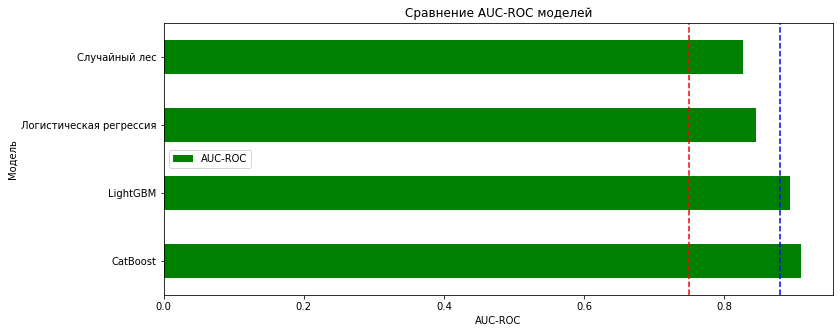

In [103]:
# минимальное обязательное значение AUC-ROC 0.75, желательное - 0.88
result.sort_values(by='AUC-ROC', ascending=False).plot.barh(y='AUC-ROC', figsize=(12,5), color='green')
plt.title('Сравнение AUC-ROC моделей')
plt.xlabel('AUC-ROC')
plt.ylabel('Модель')
plt.axvline(x=0.75, color='r', linestyle='--')
plt.axvline(x=0.88, color='b', linestyle='--')
plt.show();

Лучшую метрику AUC-ROC показала модель Catboost (0.910134) с гиперпараметрами:
- iterations: 1000
- l2_leaf_reg: 3
- learning_rate: 0.1

Будем проверять именно эту модель на тестовой выборке.

## Тестирование модели

### Тестовая выборка

Проверим нашу модель на тестовой выборке.

In [104]:
pred_proba = grid_search_cat.best_estimator_.predict_proba(features_test)[:, 1]
test_predictions = grid_search_cat.best_estimator_.predict(features_test)
roc_auc_score(target_test, pred_proba)

0.9243369992950499

Метрика AUC-ROC получилась выше, чем надо для данного проекта: 0.9243. 

### ROC-кривая

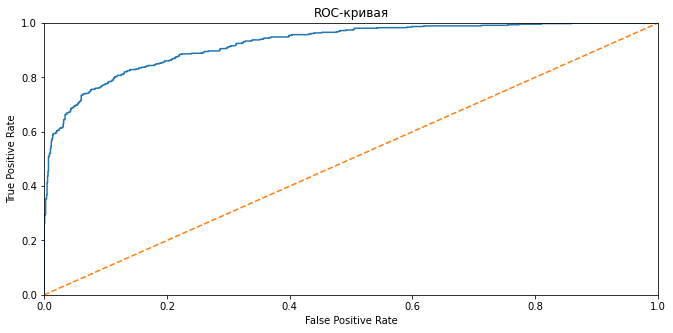

In [105]:
fpr, tpr, thresholds = roc_curve(target_test, pred_proba)
plt.figure(figsize=(11, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show();

### Классификационный отчет

In [106]:
# классификационный отчет
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1294
           1       0.82      0.70      0.76       467

    accuracy                           0.88      1761
   macro avg       0.86      0.82      0.84      1761
weighted avg       0.88      0.88      0.88      1761



Значения метрик точности и полноты тоже очень хорошие. Среднегармоничное значение F1 для класса 0 - 0.92, для класса 1 - 0.76.

### Матрица ошибок

Посмотрим на матрицу ошибок.

In [107]:
# сколько всего объектов в тестовой выборке
target_test.shape[0]

1761

In [108]:
matrix = confusion_matrix(target_test, test_predictions)
print(matrix)

[[1223   71]
 [ 138  329]]


Наша модель правильно предсказала 1223 объектов класса 0 и 71 объект класса 1.

### Важность признаков

А теперь посмотрим, какие из признаков наиболее важны для построения и обучения модели.

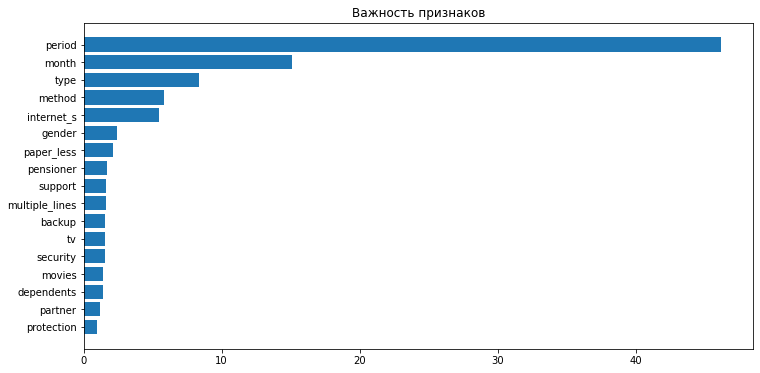

In [109]:
# на основе tree-based метода
feature_importance = grid_search_cat.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_test.columns)[sorted_idx])
plt.title('Важность признаков');

Самым важным признаком для модели является LTV - время жизни клиента. На втором месте - стоимость оплаты услуг за месяц. Третий важный признак - тип оплаты. Все это мы видели в исследовательском анализе.

Менее значимыми являются подключенные доп.услуги, наличие партнера и иждивенцев.

<b>Промежуточный вывод:</b>

При подготовке данных к обучению:
- сформировали целевой признак ухода клиента с помощью признака даты окончания договора
- добавили признак LTV (время жизни клиента в днях)
- объединили 4 датасета в один по id клиента
- обработали получившиеся пропуски
- удалили из итогового датасета признаки id клиента, дату начала и окончания договора, общую сумму оплат каждого клиента

Использовали модель Catboost с такими гиперпараметрами:
- iterations: 1000
- l2_leaf_reg: 3
- learning_rate: 0.1

Наша модель справилась успешно на тестовых данных. Полученная метрика AUC-ROC - 0.9243. Среднегармоничное значение F1 для класса 0 - 0.92, для класса 1 - 0.76.

## Вывод

В ходе данного проекта было сделано:
- изучены и проанализированы 4 датасета с данными
- переименованы названия столбцов для удобства использования
- изменены типы данных некоторых признаков
- добавлен целевой признак ухода клиента
- добавлен признак LTV
- объединены 4 датасета в 1 итоговый
- обработаны пропуски
- проведен исследовательский анализ данных, выявлено много разных закономерностей и зависимостей между признаками
- данные подготовлены к обучению
- обучены 4 разные модели: Случайный Лес, Логистическая регрессия, Catboost, LightGBM
- выбрана лучшая модель Catboost на основе метрики AUC-ROC
- проверена лучшая модель на тестовых данных
- изучена матрица ошибок и важность признаков

В итоге получили модель, которая научилась предсказывать отток клиентов телеком-компании с метрикой AUC-ROC 0.924.